Load the Data:

o Load the data into a pandas DataFrame.

2. Explore the Data:

o Display the first few rows of the dataset.

o Check for any missing values.

o Understand the basic statistics of the features and the target variable.

3. Visualize the data through Charts

3.1 Pairplot:

o Show the pairwise relationships between all variables. It helps in
understanding the distribution and interactions between features and the
target variable.

3.2 Distribution Plot:
o Display the distribution of house prices.

3.3 Scatter Plot (Square Footage vs House Price):
o Show the relationship between square footage and house price.

3.4 Box Plot (Number of Bedrooms vs House Price):
o Show the distribution of house prices for different numbers of bedrooms.

3.5 Scatter Plot (House Age vs House Price):
o Show the relationship between house age and house price.

3.6 Correlation Heatmap:
o Display the correlation coefficients between features.

4. Split the Data:
o Split the data into training and testing sets (80% training, 20% testing).

5. Train the Model:
o Implement a Multiple Linear Regression model using scikit-learn.
o Train the model on the training data.

6. Evaluate the Model:
o Predict the target variable for the test data.
o Calculate and display the Mean Squared Error (MSE) of the predictions and r2 score of
the model.

7. Visualize the Results:
o Create a scatter plot comparing the actual and predicted values of the target variable for
the test set.

8. Create a Prediction Function:
o Implement a function that takes input features and returns the predicted house price.

Hint:Function to predict house prices

def predict_house_price(square_footage, num_bedrooms, house_age):

input_features = pd.DataFrame({

&#39;Square_Footage&#39;: [square_footage],

&#39;Num_Bedrooms&#39;: [num_bedrooms],

&#39;House_Age&#39;: [house_age]
})
input_features_scaled = scaler.transform(input_features)

predicted_price = model.predict(input_features_scaled)

return predicted_price[0]

9. Determine feature importance and visualize it:
o This will determine which features contribute the most to the model&#39;s predictions. In the context of linear regression, the importance of a feature can be gauged by looking at the absolute value of its coefficients. Higher absolute values indicate greater importance.

10. Normalize the data using StandardScaler from scikit-learn and check its impact on the
model performance:

o This can be particularly useful for models like linear regression where different scales
of features can affect the coefficients and model performance.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data = pd.read_csv('/content/drive/MyDrive/Dataset Files/house_prices_data.csv')

In [40]:
data.head()

,Square_Footage,Num_Bedrooms,House_Age,House_Price
0,3674,1,61,608468.940708
1,1360,5,57,335254.995658
2,1794,5,51,402370.090653
3,1630,2,11,311854.298045
4,1595,5,38,379356.590435


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square_Footage  100 non-null    int64  
 1   Num_Bedrooms    100 non-null    int64  
 2   House_Age       100 non-null    int64  
 3   House_Price     100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [42]:
data.describe()

,Square_Footage,Num_Bedrooms,House_Age,House_Price
count,100.000000,100.000000,100.000000,100.000000
mean,2368.700000,2.970000,47.780000,449659.080684
std,1018.723617,1.480206,31.132684,154305.631374
min,521.000000,1.000000,0.000000,133560.988172
25%,1566.750000,1.000000,19.000000,313684.825488
50%,2468.000000,3.000000,50.000000,450938.501852
75%,3288.750000,4.000000,72.500000,568634.253802
max,3999.000000,5.000000,98.000000,756310.952144


In [43]:
data.duplicated().sum()

0

In [44]:
data.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
House_Age,0
House_Price,0


In [45]:
data.shape

(100, 4)

In [46]:
data.nunique()

,0
Square_Footage,99
Num_Bedrooms,5
House_Age,58
House_Price,100


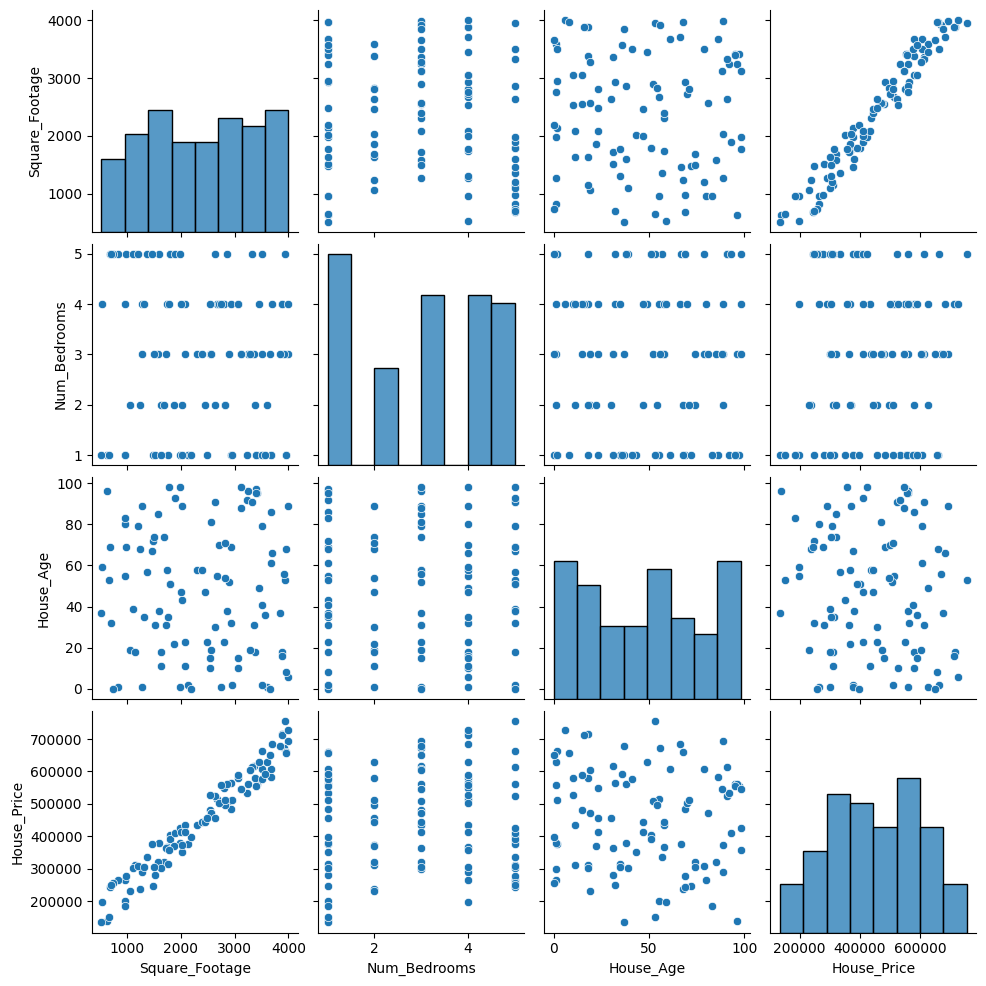

In [47]:
numerical_data = data[['Square_Footage', 'Num_Bedrooms', 'House_Age', 'House_Price']]

sns.pairplot(numerical_data, diag_kind='hist')
plt.show()

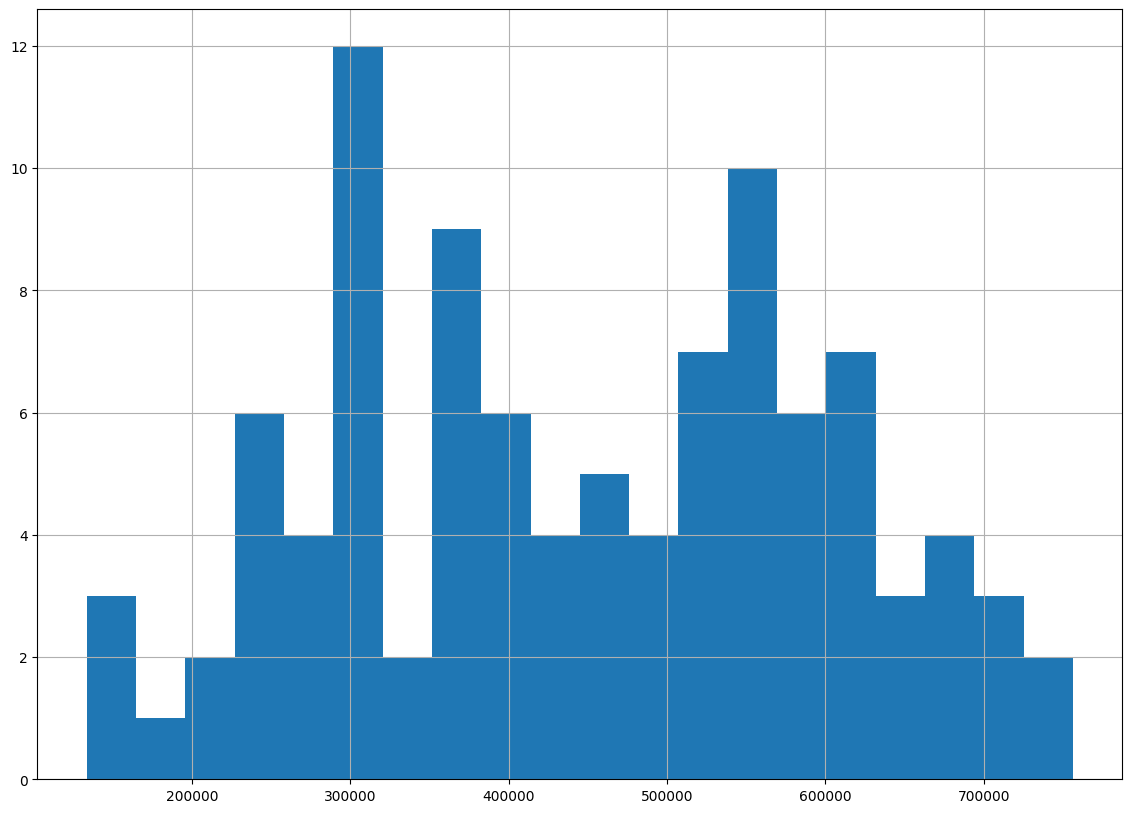

In [48]:
import matplotlib.pyplot as plt

data['House_Price'].hist(bins=20, figsize=(14, 10))
plt.show()

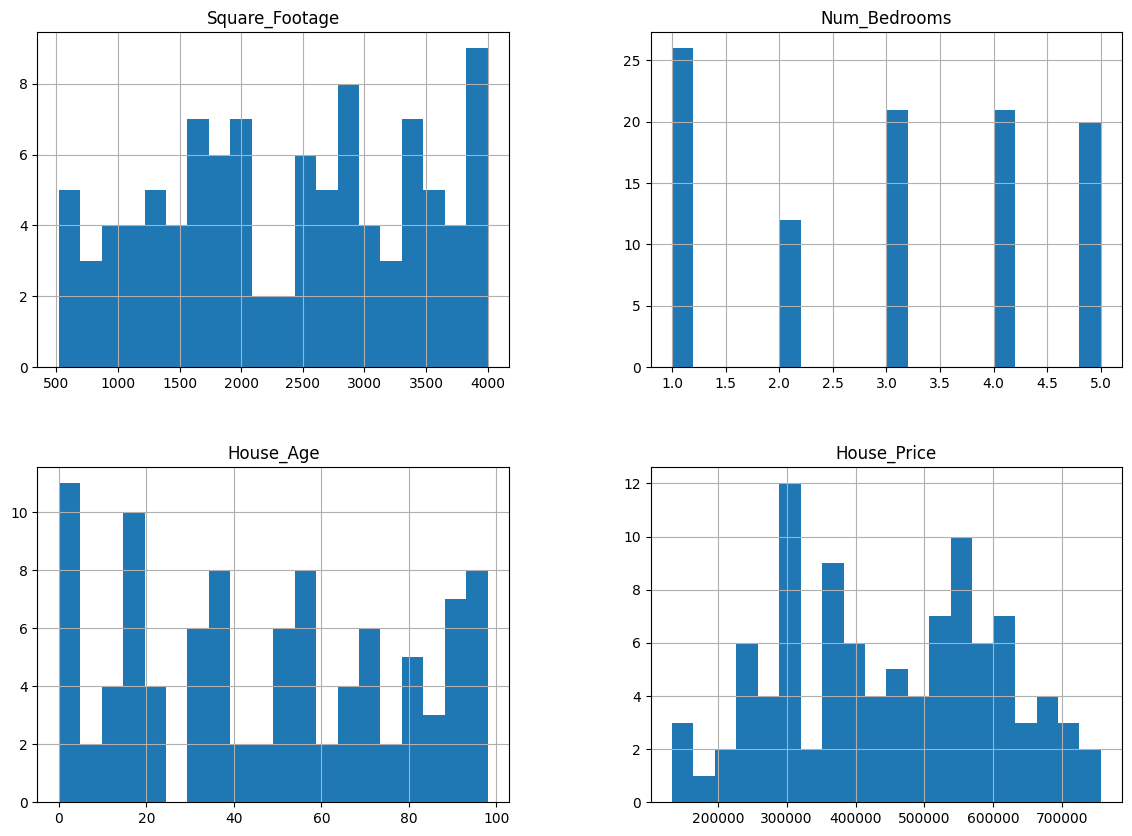

In [49]:
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(14, 10))
plt.show()

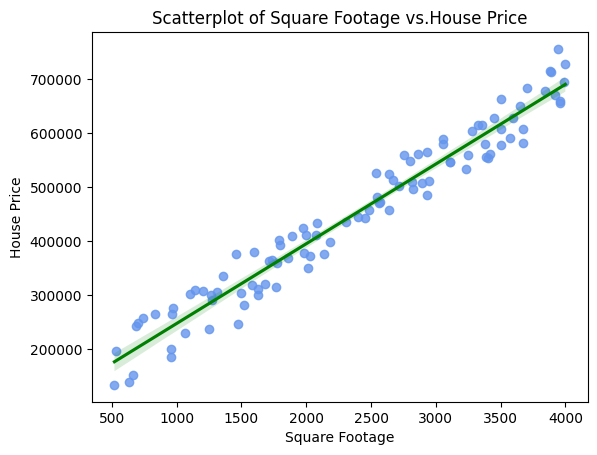

In [50]:
sns.regplot(x='Square_Footage', y='House_Price', data=data,
            scatter=True, color='cornflowerblue', line_kws={"color": "green"})

plt.title('Scatterplot of Square Footage vs.House Price')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.show()

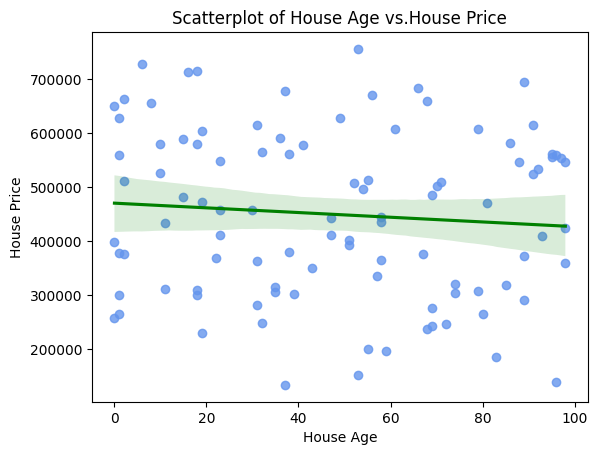

In [51]:
sns.regplot(x='House_Age', y='House_Price', data=data,
            scatter=True, color='cornflowerblue', line_kws={"color": "green"})

plt.title('Scatterplot of House Age vs.House Price')
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()

<ipython-input-52-d34f3c687423>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




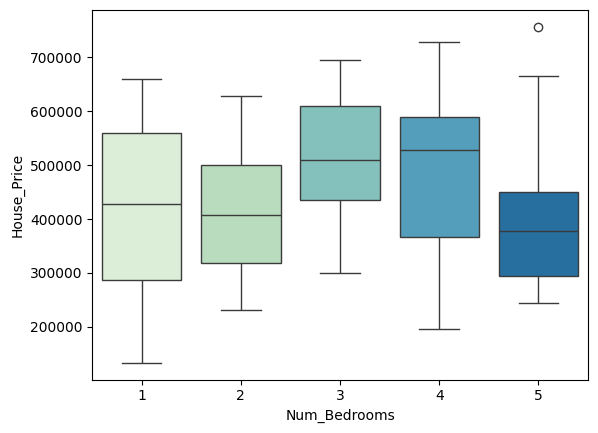

In [52]:
sns.boxplot(y=data['House_Price'], x=data['Num_Bedrooms'],  palette='GnBu')
plt.show()


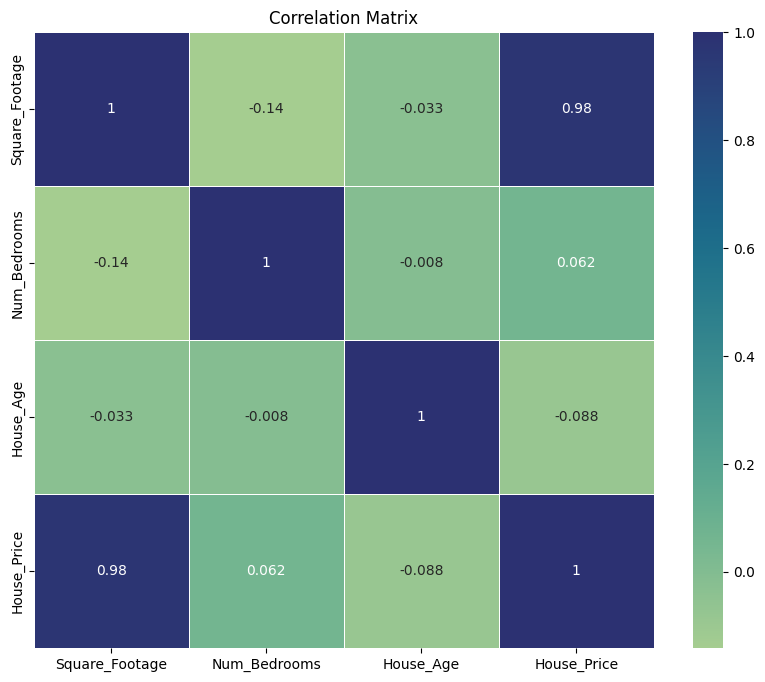

In [53]:
correlation_matrix = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [56]:
X = data[['Square_Footage', 'Num_Bedrooms', 'House_Age']]
y = data['House_Price']

In [57]:
X

,Square_Footage,Num_Bedrooms,House_Age
0,3674,1,61
1,1360,5,57
2,1794,5,51
3,1630,2,11
4,1595,5,38
...,...,...,...
95,2817,2,71
96,1315,4,35
97,3842,3,37
98,955,1,83


In [58]:
y

,House_Price
0,608468.940708
1,335254.995658
2,402370.090653
3,311854.298045
4,379356.590435
...,...
95,510486.244121
96,304914.268321
97,677489.704322
98,184956.137068


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = regressor.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 91726130.73039028
R-squared: 0.9965233213503354


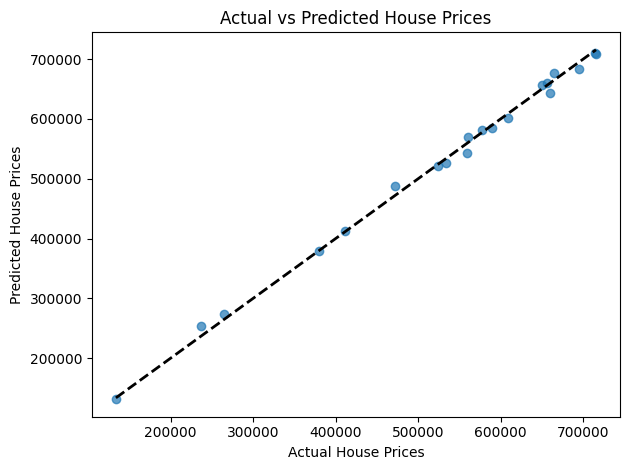

In [63]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)


# Function to predict house prices
def predict_house_price(square_footage, num_bedrooms, house_age):
    # Create a DataFrame with the input features
    input_features = pd.DataFrame({
        'Square_Footage': [square_footage],
        'Num_Bedrooms': [num_bedrooms],
        'House_Age': [house_age]
    })

    # Scale the input features using the scaler
    input_features_scaled = scaler.transform(input_features)

    # Predict the house price using the model
    predicted_price = regressor.predict(input_features_scaled)

    # Return the predicted price (first element)
    return predicted_price[0]


predicted_price = predict_house_price(3000, 4, 5)
print(f"The predicted house price is: ${predicted_price:.2f}")


The predicted house price is: $578779.79


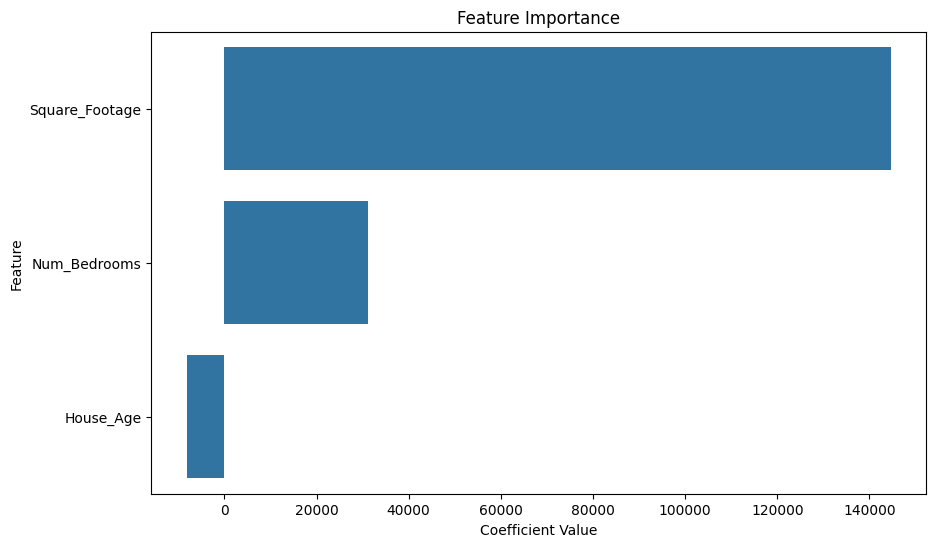

In [75]:
# Feature importance
importance = regressor.coef_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a model on normalized data
model_normalized = LinearRegression()
model_normalized.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_normalized = model_normalized.predict(X_test_scaled)
print("\nPerformance on Normalized Data:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_normalized)}")
print(f"R-Squared: {r2_score(y_test, y_pred_normalized)}")


Performance on Normalized Data:
Mean Squared Error: 91726130.73039143
R-Squared: 0.9965233213503353
